In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
# file paths
zones = ["a_to_a", "a_to_b", "a_to_c", "a_to_d","b_to_b","b_to_c","b_to_d","c_to_c","c_to_d","d_to_d"]
c5nlarge = ["results/c5nlarge/" + x + ".json" for x in zones]
c5nlarge_groups = ["results/c5nlarge_vm_placementgroups/" + x + ".json" for x in zones]
m5large = ["results/m5large/" + x + ".json" for x in zones]
m5large_groups = ["results/m5large_vm_placementgroups/" + x + ".json" for x in zones]
t3micro = ["results/t3micro/" + x + ".json" for x in zones]
t2micro = ["results/t2micro/" + x + ".json" for x in ["a_to_a", "a_to_b", "a_to_c", "b_to_b","b_to_c", "c_to_c"]]


In [3]:
# parsing json
def parse_json(file_list):
    rtt = []
    retransmits = []
    avgBW = []
    clientCPU = []
    serverCPU = []
    for i in file_list:
        f = open(i)
        data = json.load(f)
        rtt.append(data["end"]["streams"][0]["sender"]["mean_rtt"])
        retransmits.append(data["end"]["sum_sent"]["retransmits"])
        avgBW.append(data["end"]["streams"][0]["receiver"]["bits_per_second"]/1000000000)
        clientCPU.append(data["end"]["cpu_utilization_percent"]["host_total"])
        serverCPU.append(data["end"]["cpu_utilization_percent"]["remote_total"])
    
    return (rtt, retransmits, avgBW, clientCPU, serverCPU)

# reshaping data
def list_to_4by4(l):
    return np.array([
            [l[0], l[1], l[2], l[3]],
            [np.nan, l[4], l[5], l[6]],
            [np.nan, np.nan, l[7], l[8]],
            [np.nan, np.nan, np.nan, l[9]]
    ])

def list_to_3by3(l):
    return np.array([
            [l[0], l[1], l[2]],
            [np.nan, l[3], l[4]],
            [np.nan, np.nan, l[5]]
    ])

In [4]:
c5nl_rtt, c5nl_retransmits, c5nl_avgBW, c5nl_clientCPU, c5nl_serverCPU = parse_json(c5nlarge)
m5l_rtt, m5l_retransmits, m5l_avgBW, m5l_clientCPU, m5l_serverCPU = parse_json(m5large)
t3m_rtt, t3m_retransmits, t3m_avgBW, t3m_clientCPU, t3m_serverCPU = parse_json(t3micro)
t2m_rtt, t2m_retransmits, t2m_avgBW, t2m_clientCPU, t2m_serverCPU = parse_json(t2micro)
c5nl_rtt_grouped, c5nl_retransmits_grouped, c5nl_avgBW_grouped, c5nl_clientCPU_grouped, c5nl_serverCPU_grouped = parse_json(c5nlarge_groups)
m5l_rtt_grouped, m5l_retransmits_grouped, m5l_avgBW_grouped, m5l_clientCPU_grouped, m5l_serverCPU_grouped = parse_json(m5large_groups)

In [5]:
axis_label = ["us-west-2a", "us-west-2b", "us-west-2c", "us-west-2d"]
axis_label2 = ["us-west-2a", "us-west-2b", "us-west-2c"]

In [6]:
c5nl_rtt = list_to_4by4(c5nl_rtt)
c5nl_retransmits = list_to_4by4(c5nl_retransmits)
c5nl_avgBW = list_to_4by4(c5nl_avgBW)
c5nl_clientCPU = list_to_4by4(c5nl_clientCPU)
c5nl_serverCPU = list_to_4by4(c5nl_serverCPU)

m5l_rtt = list_to_4by4(m5l_rtt)
m5l_retransmits = list_to_4by4(m5l_retransmits)
m5l_avgBW = list_to_4by4(m5l_avgBW)
m5l_clientCPU = list_to_4by4(m5l_clientCPU)
m5l_serverCPU = list_to_4by4(m5l_serverCPU)

t3m_rtt = list_to_4by4(t3m_rtt)
t3m_retransmits = list_to_4by4(t3m_retransmits)
t3m_avgBW = list_to_4by4(t3m_avgBW)
t3m_clientCPU = list_to_4by4(t3m_clientCPU)
t3m_serverCPU = list_to_4by4(t3m_serverCPU)

c5nl_rtt_grouped = list_to_4by4(c5nl_rtt_grouped)
c5nl_retransmits_grouped = list_to_4by4(c5nl_retransmits_grouped)
c5nl_avgBW_grouped = list_to_4by4(c5nl_avgBW_grouped)
c5nl_clientCPU_grouped = list_to_4by4(c5nl_clientCPU_grouped)
c5nl_serverCPU_grouped = list_to_4by4(c5nl_serverCPU_grouped)

m5l_rtt_grouped = list_to_4by4(m5l_rtt_grouped)
m5l_retransmits_grouped = list_to_4by4(m5l_retransmits_grouped)
m5l_avgBW_grouped = list_to_4by4(m5l_avgBW_grouped)
m5l_clientCPU_grouped = list_to_4by4(m5l_clientCPU_grouped)
m5l_serverCPU_grouped = list_to_4by4(m5l_serverCPU_grouped)

t2m_rtt = list_to_3by3(t2m_rtt)
t2m_retransmits = list_to_3by3(t2m_retransmits)
t2m_avgBW = list_to_3by3(t2m_avgBW)
t2m_clientCPU = list_to_3by3(t2m_clientCPU)
t2m_serverCPU = list_to_3by3(t2m_serverCPU)

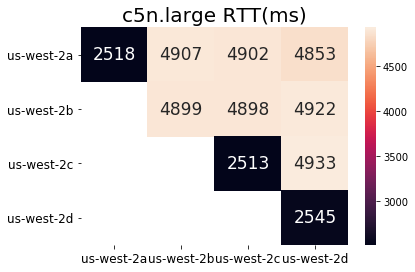

In [8]:
sns.heatmap(c5nl_rtt, annot=c5nl_rtt, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("c5n.large RTT(ms)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlarge/rtt.png", dpi=150, bbox_inches="tight")
plt.show()

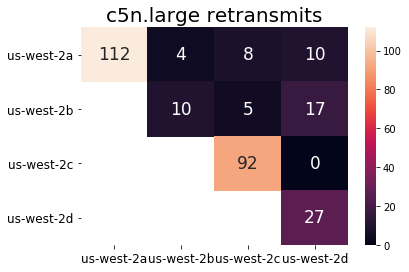

In [9]:
sns.heatmap(c5nl_retransmits, annot=c5nl_retransmits, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("c5n.large retransmits", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlarge/retransmits.png", dpi=150, bbox_inches="tight")
plt.show()

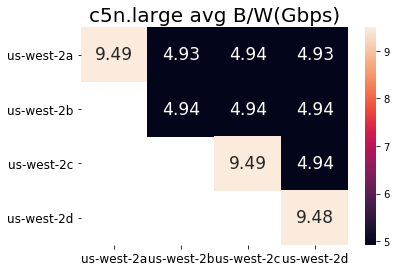

In [10]:
sns.heatmap(c5nl_avgBW, annot=c5nl_avgBW, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("c5n.large avg B/W(Gbps)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlarge/bw.png", dpi=150, bbox_inches="tight")
plt.show()

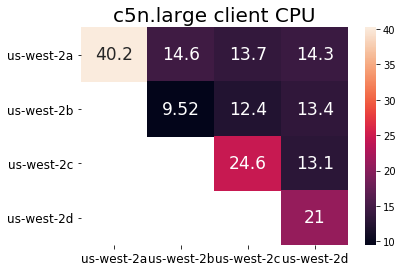

In [11]:
sns.heatmap(c5nl_clientCPU, annot=c5nl_clientCPU, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("c5n.large client CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlarge/client_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

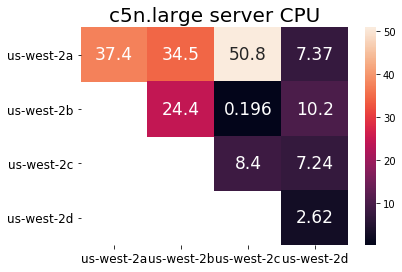

In [12]:
sns.heatmap(c5nl_serverCPU, annot=c5nl_serverCPU, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("c5n.large server CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlarge/server_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

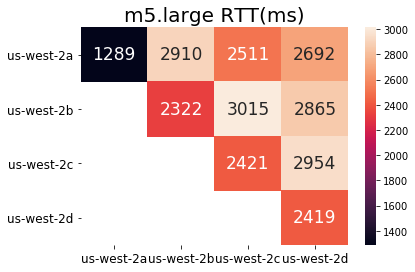

In [13]:
sns.heatmap(m5l_rtt, annot=m5l_rtt, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("m5.large RTT(ms)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5large/rtt.png", dpi=150, bbox_inches="tight")
plt.show()

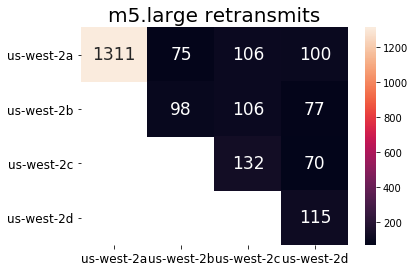

In [14]:
sns.heatmap(m5l_retransmits, annot=m5l_retransmits, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("m5.large retransmits", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5large/retransmits.png", dpi=150, bbox_inches="tight")
plt.show()

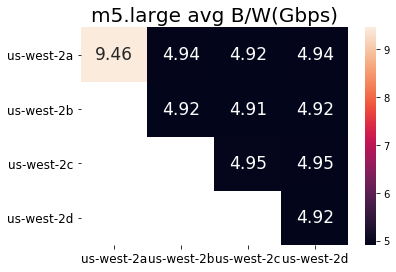

In [15]:
sns.heatmap(m5l_avgBW, annot=m5l_avgBW, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("m5.large avg B/W(Gbps)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5large/bw.png", dpi=150, bbox_inches="tight")
plt.show()

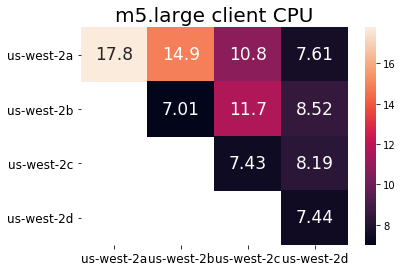

In [16]:
sns.heatmap(m5l_clientCPU, annot=m5l_clientCPU, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("m5.large client CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5large/client_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

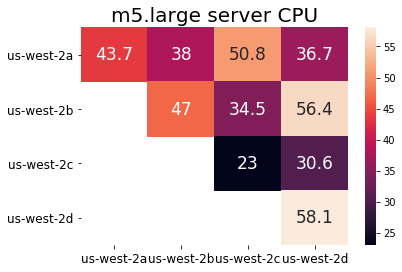

In [17]:
sns.heatmap(m5l_serverCPU, annot=m5l_serverCPU, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("m5.large server CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5large/server_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

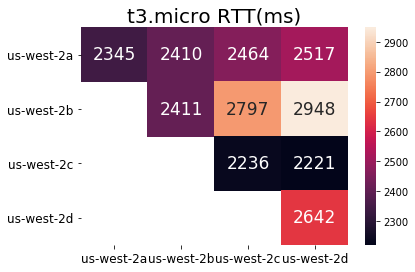

In [18]:
sns.heatmap(t3m_rtt, annot=t3m_rtt, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("t3.micro RTT(ms)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t3micro/rtt.png", dpi=150, bbox_inches="tight")
plt.show()

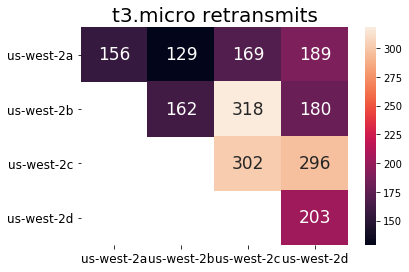

In [19]:
sns.heatmap(t3m_retransmits, annot=t3m_retransmits, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("t3.micro retransmits", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t3micro/retransmits.png", dpi=150, bbox_inches="tight")
plt.show()

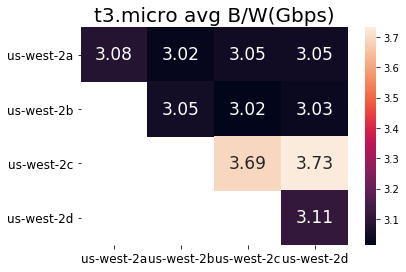

In [20]:
sns.heatmap(t3m_avgBW, annot=t3m_avgBW, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("t3.micro avg B/W(Gbps)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t3micro/bw.png", dpi=150, bbox_inches="tight")
plt.show()

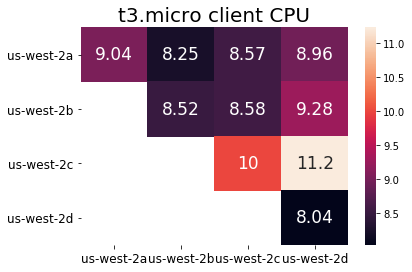

In [21]:
sns.heatmap(t3m_clientCPU, annot=t3m_clientCPU, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("t3.micro client CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t3micro/client_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

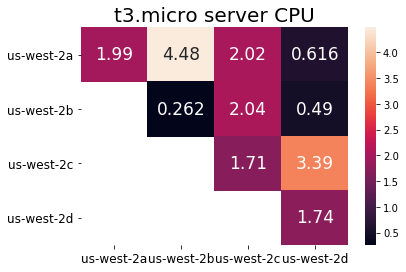

In [22]:
sns.heatmap(t3m_serverCPU, annot=t3m_serverCPU, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("t3.micro server CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t3micro/server_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

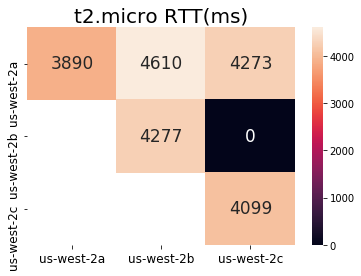

In [23]:
sns.heatmap(t2m_rtt, annot=t2m_rtt, xticklabels=axis_label2, yticklabels=axis_label2,
            annot_kws={"size":17}, fmt=".20g")
plt.title("t2.micro RTT(ms)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t2micro/rtt.png", dpi=150, bbox_inches="tight")
plt.show()

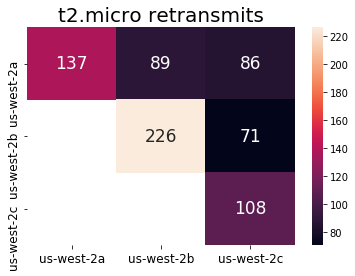

In [24]:
sns.heatmap(t2m_retransmits, annot=t2m_retransmits, xticklabels=axis_label2, yticklabels=axis_label2,
            annot_kws={"size":17}, fmt=".20g")
plt.title("t2.micro retransmits", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t2micro/retransmits.png", dpi=150, bbox_inches="tight")
plt.show()

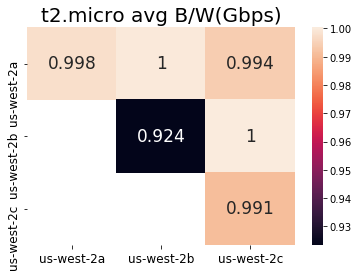

In [25]:
sns.heatmap(t2m_avgBW, annot=t2m_avgBW, xticklabels=axis_label2, yticklabels=axis_label2,
            annot_kws={"size":17}, fmt=".3g")
plt.title("t2.micro avg B/W(Gbps)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t2micro/bw.png", dpi=150, bbox_inches="tight")
plt.show()

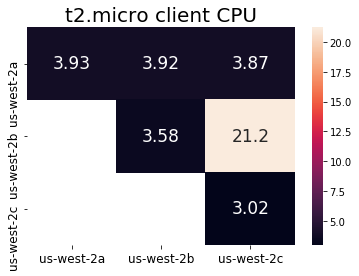

In [26]:
sns.heatmap(t2m_clientCPU, annot=t2m_clientCPU, xticklabels=axis_label2, yticklabels=axis_label2,
            annot_kws={"size":17}, fmt=".3g")
plt.title("t2.micro client CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t2micro/client_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

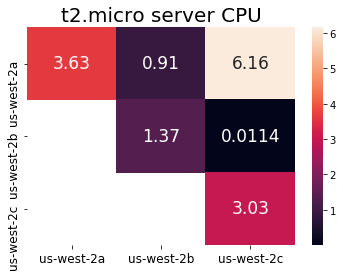

In [27]:
sns.heatmap(t2m_serverCPU, annot=t2m_serverCPU, xticklabels=axis_label2, yticklabels=axis_label2,
            annot_kws={"size":17}, fmt=".3g")
plt.title("t2.micro server CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/t2micro/server_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

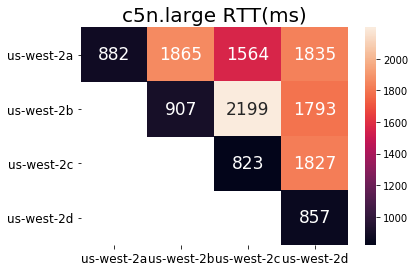

In [28]:
sns.heatmap(c5nl_rtt_grouped, annot=c5nl_rtt_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("c5n.large RTT(ms)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlargecluster/rtt.png", dpi=150, bbox_inches="tight")
plt.show()

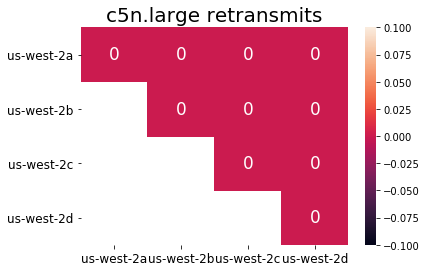

In [29]:
sns.heatmap(c5nl_retransmits_grouped, annot=c5nl_retransmits_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("c5n.large retransmits", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlargecluster/retransmits.png", dpi=150, bbox_inches="tight")
plt.show()

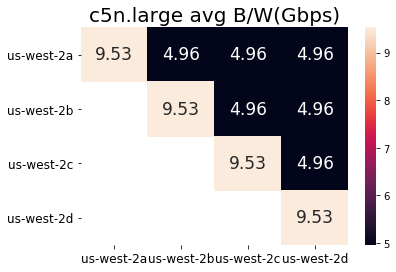

In [30]:
sns.heatmap(c5nl_avgBW_grouped, annot=c5nl_avgBW_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("c5n.large avg B/W(Gbps)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlargecluster/bw.png", dpi=150, bbox_inches="tight")
plt.show()

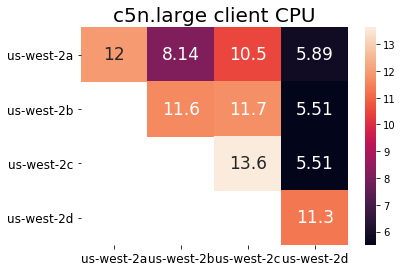

In [31]:
sns.heatmap(c5nl_clientCPU_grouped, annot=c5nl_clientCPU_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("c5n.large client CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlargecluster/client_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

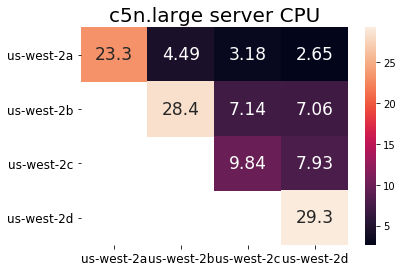

In [32]:
sns.heatmap(c5nl_serverCPU_grouped, annot=c5nl_serverCPU_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("c5n.large server CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/c5nlargecluster/server_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

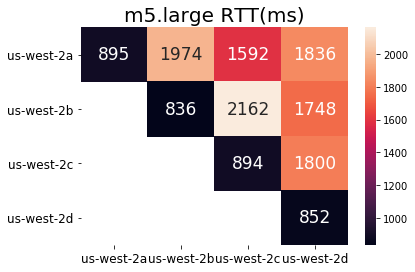

In [33]:
sns.heatmap(m5l_rtt_grouped, annot=m5l_rtt_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("m5.large RTT(ms)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5largecluster/rtt.png", dpi=150, bbox_inches="tight")
plt.show()

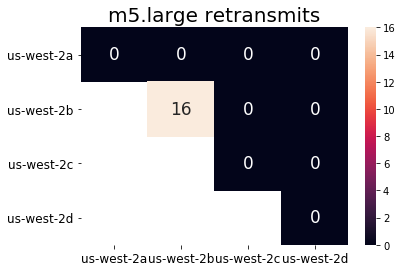

In [34]:
sns.heatmap(m5l_retransmits_grouped, annot=m5l_retransmits_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".20g")
plt.title("m5.large retransmits", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5largecluster/retransmits.png", dpi=150, bbox_inches="tight")
plt.show()

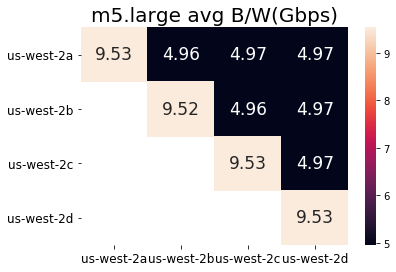

In [35]:
sns.heatmap(m5l_avgBW_grouped, annot=m5l_avgBW_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("m5.large avg B/W(Gbps)", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5largecluster/bw.png", dpi=150, bbox_inches="tight")
plt.show()

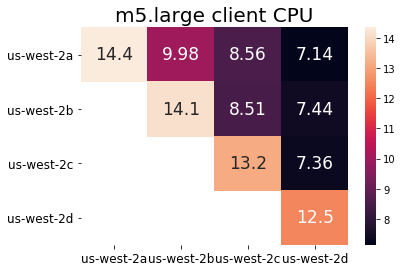

In [36]:
sns.heatmap(m5l_clientCPU_grouped, annot=m5l_clientCPU_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("m5.large client CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5largecluster/client_cpu.png", dpi=150, bbox_inches="tight")
plt.show()

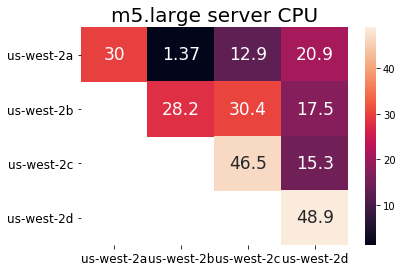

In [37]:
sns.heatmap(m5l_serverCPU_grouped, annot=m5l_serverCPU_grouped, xticklabels=axis_label, yticklabels=axis_label,
            annot_kws={"size":17}, fmt=".3g")
plt.title("m5.large server CPU", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("images/m5largecluster/server_cpu.png", dpi=150, bbox_inches="tight")
plt.show()